# UK Ecommerce Datasheet Cleaning and Analysis

### Importing Python Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Storing Data in Data Frame
in this next code snippet I store the data in a data frame using pandas for data cleaning and manipulation. The data is located in the Data folder of the project file structure and I had to set the encoding to 'latin1' as otherwise it gave me an error I suspect this is because the data set is not in UTF encoding.

In [2]:
df = pd.read_csv('../Data/ecommerce_data.csv', encoding='latin1')

## Data Frame Basic Information And Cleaning

In [ ]:
print("Rows, Columns: ", df.shape)
df.head()

Rows, Columns:  (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000

This shows how many rows and columns in the Data Set. Also by using the head function I can get a look at the columns and rows as well as what data type each column represents. I can see that columns "InvoiceNo", "StockCode", and "Description" are all objects. In the next block of code I will type cast them to their respective Data Types as object is incorrect for all of them.

In [14]:
df['Country'] = df['Country'].astype('category')
df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'], errors='coerce')
df['StockCode'] = df['StockCode'].astype('category')
df['Description'] = df['Description'].astype('string')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    532618 non-null  float64       
 1   StockCode    541909 non-null  category      
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(3), int64(1), string(1)
memory usage: 26.5 MB
None


We now do not have any columns with the data type "object", The "Country" column was type casted into categories, "InvoiceNo" casted to be numeric, "StockCode" as a category type, "Description" as a string, and "InvoiceDate" to date and time. This will help us analyze the data as if they all stayed categories certain functions would not have worked and resulted in errors.

In [15]:
print(df.isnull().sum())

InvoiceNo        9291
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


This section shows how many null values we have for each coulmn. Looking at the result I could see that there are lots of entries in Description and CustomerID in which there are null values, therefore they should be cleaned as they are not complete rows.

In [16]:
df=df.dropna(subset=['Description'])
df=df.dropna(subset=['CustomerID'])
df=df.drop_duplicates()
print(df.isnull().sum())

InvoiceNo      8872
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64


Based off of the previous section I call to drop the NA values in the columns 'Description' and 'CustomerID'. After performing this I dropped all duplicate rows inside off the data frame. This is simple data cleaning that is necessary in order to analyze the data.

In [17]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365.0,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


This is the last prepartion step in my data cleaning section in which I filtered the data frame to only include rows where 'Quantity' is greater than 0. I also standardized the 'InvoiceDate' format with the 'to_datetime' method. Lastly I added another column to a data frame which shows the total price of all the stock by multiplying quantity by the price of a unit.

## Data Analysis - Basic

Number of unique customers: 4338
Number of unique products: 3665
Top 5 countries by number of transactions:
Country
United Kingdom    349203
Germany             9025
France              8326
EIRE                7226
Spain               2479
Name: count, dtype: int64
Total revenue: £8,887,208.89
Top 5 products by total sales:
Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
Name: TotalPrice, dtype: float64
Revenue of Top 5 Countries: Country
United Kingdom    7285024.644
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Name: TotalPrice, dtype: float64


C:\Users\DDubr\AppData\Local\Temp\ipykernel_22120\931567355.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("Revenue of Top 5 Countries:", df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5))


<Axes: title={'center': 'Monthly Sales'}, xlabel='InvoiceDate'>

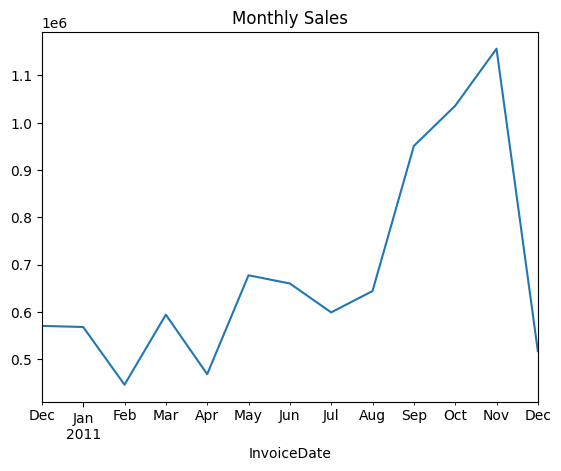

In [18]:
num_customers = df['CustomerID'].nunique()
print(f"Number of unique customers: {num_customers}")

num_products = df['StockCode'].nunique()
print(f"Number of unique products: {num_products}")


top_countries = df['Country'].value_counts().head(5)
print("Top 5 countries by number of transactions:")
print(top_countries)


total_revenue = df['TotalPrice'].sum()
print(f"Total revenue: £{total_revenue:,.2f}")

top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(5)
print("Top 5 products by total sales:")
print(top_products)

print("Revenue of Top 5 Countries:", df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5))

df.set_index('InvoiceDate').resample('ME')['TotalPrice'].sum().plot(title='Monthly Sales')


## Monthly / Quarterly Sales Trends Anaylsis

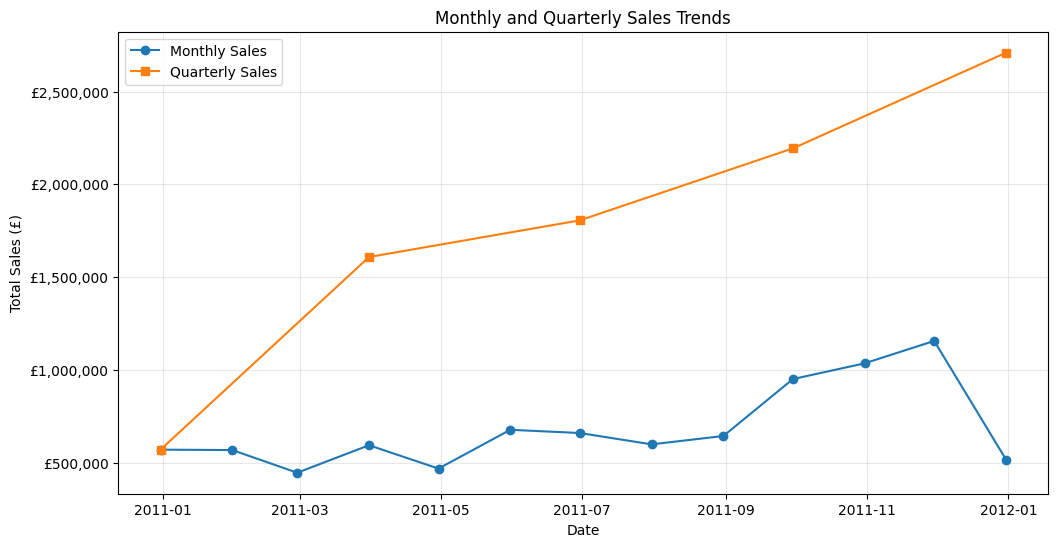

In [25]:
monthly_sales = df.set_index('InvoiceDate').resample('ME')['TotalPrice'].sum()
quarterly_sales = df.set_index('InvoiceDate').resample('QE')['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', label='Monthly Sales')
plt.plot(quarterly_sales.index, quarterly_sales.values, marker='s', label='Quarterly Sales')
plt.title('Monthly and Quarterly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales (£)')
plt.legend()

# Fix the y-axis formatting
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'£{x:,.0f}'))
plt.grid(True, alpha=0.3)
plt.show()